In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
import streamlit as st
from google.oauth2.service_account import Credentials

In [192]:
# 1. Define el scope y crea las credenciales (usando secrets si estás en Streamlit Cloud)
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive", "https://www.googleapis.com/auth/drive.file"]

In [193]:
# Arreglar clave privada si viene como string con saltos reales
key_info = dict(st.secrets["gcp_service_account"])
key_info["private_key"] = key_info["private_key"].replace("\\n", "\n") if "\\n" in key_info["private_key"] else key_info["private_key"]

In [194]:
# Desde secrets (recomendado para Streamlit Cloud)
creds = Credentials.from_service_account_info(st.secrets["gcp_service_account"], scopes=scope)

In [195]:
# 2. Autenticación y conexión al Google Sheet
client = gspread.authorize(creds)

In [196]:
# 3. Abre el Google Sheet por su nombre (también puedes usar su URL o ID)
spreadsheet = client.open("Planning_Tracker_VSP")

In [197]:
# 4. Selecciona la hoja "Transferencias"
worksheet = spreadsheet.worksheet("Eventos")

In [198]:
# 5. Convierte el contenido en DataFrame
data = worksheet.get_all_records()  # devuelve una lista de diccionarios
data_servicios_vsp = pd.DataFrame(data)

In [199]:
data_servicios_vsp

,Evento,PAX,€ PAX,Ingreso Est. €,Gasto Est. €,Margen Est. €,Factura,Cobros,Pagos,Retenciones,...,Cliente Final,Esfuerzo,Contacto,Actividad,Semana,Mes,Año,Actividad 2,Dif margen estimado vs real,Columna 1
0,Faunia-UCI-iPad Challenge-3/10/2023,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,,"2.865,9 €","-1.158,3 €","0,00€",...,UCI,Normal,Melina,iPad Challenge,40,10,2023,,-3%,
1,CIL-María José-Mariachi-8/10/2023,40,"18,0 €","720,0 €","630,0 €",90 €,,"720,0 €","-630,3 €","-130,51€",...,María José,Normal,María José,Mariachi,41,10,2023,,-145%,
2,TIQETS--Espectáculo flamenco-18/10/2023,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,,"3.553,7 €","-3.099,4 €","-467,65€",...,TIQETS,Normal,Teresa Broccoli,Espectáculo flamenco,42,10,2023,,-101%,
3,Kaizen-Caetano Retail-iPad Challenge-20/10/2023,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,,"4.311,0 €","-2.167,4 €","-17,74€",...,Caetano Retail,Normal,Luis López,iPad Challenge,42,10,2023,,-14%,
4,CITITRAVEL-Astellas-iPad Challenge-24/10/2023,32,"40,5 €","1.296,0 €","358,0 €",938 €,,"1.296,0 €","-382,2 €","0,00€",...,Astellas,Normal,Carlos Rosa,iPad Challenge,43,10,2023,,-3%,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Fiesta Infantil Cuatrecasas | Navidad 2025-Cua...,200,"30,0 €","5.999,0 €","4.350,0 €",1.649 €,,"0,0 €","-19,6 €","0,00€",...,Cuatrecasas,Normal,Mª Carmen Moreno,Family Day,50,12,2025,,-101%,
134,Cóctel cena CIL adultos-CIL-CIL-2025-12-12,,,,,,,"0,0 €","0,0 €","0,00€",...,CIL,Normal,María José Salas,Fiesta Navidad,50,12,2025,,#DIV/0!,
135,Nueva petición Endesa- Albacete- 27 noviembre-...,19,"0,0 €",,,,,"0,0 €","0,0 €","0,00€",...,Endesa,Normal,Gema Alcalde,Cata/Taller de Vinos,48,11,2025,,#DIV/0!,
136,Fiesta Navidad CIL niños-CIL-CIL-2025-12-14,,,,,,,"0,0 €","0,0 €","0,00€",...,CIL,Normal,María José Salas,Fiesta Navidad infalntil,51,12,2025,,#DIV/0!,


In [200]:
data_servicios_vsp.columns = data_servicios_vsp.columns.str.lower()

In [201]:
data_servicios_vsp.columns

Index(['evento', 'pax', '€ pax', 'ingreso est. €', 'gasto est. €',
       'margen est. €', 'factura', 'cobros', 'pagos', 'retenciones',
       'pagos + r', 'margen (g)', 'cliente vsp', 'fee amex', 'tipo actividad',
       'fecha evento', 'ds', 'lugar evento', 'cliente final', 'esfuerzo',
       'contacto', 'actividad', 'semana', 'mes', 'año', 'actividad 2',
       'dif margen estimado vs real', 'columna 1'],
      dtype='object')

In [202]:
data_servicios_vsp = data_servicios_vsp[['tipo actividad', 'fecha evento', 'cliente vsp', 'cliente final', 
    'lugar evento',  'pax', '€ pax', 'ingreso est. €', 'gasto est. €',
       'margen est. €', 'cobros', 'pagos', 'margen (g)',
       'esfuerzo', 'actividad', 'mes', 'año', ]]

data_servicios_vsp

,tipo actividad,fecha evento,cliente vsp,cliente final,lugar evento,pax,€ pax,ingreso est. €,gasto est. €,margen est. €,cobros,pagos,margen (g),esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,"2.865,9 €","-1.158,3 €","1.707,60€",Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,"18,0 €","720,0 €","630,0 €",90 €,"720,0 €","-630,3 €","-40,80€",Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,"3.553,7 €","-3.099,4 €","-13,30€",Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,"4.311,0 €","-2.167,4 €","2.125,90€",Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,"40,5 €","1.296,0 €","358,0 €",938 €,"1.296,0 €","-382,2 €","913,90€",Normal,iPad Challenge,10,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Evento,2025-12-13,Cuatrecasas,Cuatrecasas,Madrid,200,"30,0 €","5.999,0 €","4.350,0 €",1.649 €,"0,0 €","-19,6 €","-19,60€",Normal,Family Day,12,2025
134,Evento,2025-12-12,CIL,CIL,"Madrid, Masía de Jose Luis",,,,,,"0,0 €","0,0 €","0,00€",Normal,Fiesta Navidad,12,2025
135,Actividad,2025-11-27,AMEX,Endesa,Albacete,19,"0,0 €",,,,"0,0 €","0,0 €","0,00€",Normal,Cata/Taller de Vinos,11,2025
136,Evento,2025-12-14,CIL,CIL,"Madrid, Masía de Jose Luis",,,,,,"0,0 €","0,0 €","0,00€",Normal,Fiesta Navidad infalntil,12,2025


In [203]:
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace("€", "eur")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(".", "")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(" (g)", "")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(" / ", " ")
data_servicios_vsp.columns = data_servicios_vsp.columns.str.replace(" ", "_")

In [204]:
data_servicios_vsp

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,"2.865,9 €","-1.158,3 €","1.707,60€",Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,"18,0 €","720,0 €","630,0 €",90 €,"720,0 €","-630,3 €","-40,80€",Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,"3.553,7 €","-3.099,4 €","-13,30€",Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,"4.311,0 €","-2.167,4 €","2.125,90€",Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,"40,5 €","1.296,0 €","358,0 €",938 €,"1.296,0 €","-382,2 €","913,90€",Normal,iPad Challenge,10,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Evento,2025-12-13,Cuatrecasas,Cuatrecasas,Madrid,200,"30,0 €","5.999,0 €","4.350,0 €",1.649 €,"0,0 €","-19,6 €","-19,60€",Normal,Family Day,12,2025
134,Evento,2025-12-12,CIL,CIL,"Madrid, Masía de Jose Luis",,,,,,"0,0 €","0,0 €","0,00€",Normal,Fiesta Navidad,12,2025
135,Actividad,2025-11-27,AMEX,Endesa,Albacete,19,"0,0 €",,,,"0,0 €","0,0 €","0,00€",Normal,Cata/Taller de Vinos,11,2025
136,Evento,2025-12-14,CIL,CIL,"Madrid, Masía de Jose Luis",,,,,,"0,0 €","0,0 €","0,00€",Normal,Fiesta Navidad infalntil,12,2025


In [205]:
# Primero, aseguramos que las fechas están en el formato adecuado
data_servicios_vsp['fecha_evento'] = pd.to_datetime(data_servicios_vsp['fecha_evento'], format='%Y-%m-%d', errors='coerce')

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/536528156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp['fecha_evento'] = pd.to_datetime(data_servicios_vsp['fecha_evento'], format='%Y-%m-%d', errors='coerce')


In [206]:
data_servicios_vsp.columns

Index(['tipo_actividad', 'fecha_evento', 'cliente_vsp', 'cliente_final',
       'lugar_evento', 'pax', 'eur_pax', 'ingreso_est_eur', 'gasto_est_eur',
       'margen_est_eur', 'cobros', 'pagos', 'margen', 'esfuerzo', 'actividad',
       'mes', 'año'],
      dtype='object')

In [207]:
data_servicios_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,"2.865,9 €","-1.158,3 €","1.707,60€",Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,"18,0 €","720,0 €","630,0 €",90 €,"720,0 €","-630,3 €","-40,80€",Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,"3.553,7 €","-3.099,4 €","-13,30€",Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,"4.311,0 €","-2.167,4 €","2.125,90€",Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,"40,5 €","1.296,0 €","358,0 €",938 €,"1.296,0 €","-382,2 €","913,90€",Normal,iPad Challenge,10,2023


In [208]:
# Eliminar el símbolo " €" y convertir los valores a tipo float
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos']] = \
    data_servicios_vsp[['eur_pax', 'ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos']].replace(" €", "", regex=True)

data_servicios_vsp[["margen"]] = data_servicios_vsp[['margen']].replace("€", "", regex=True)

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/480718567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos']] = \
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/480718567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[["margen"]] = data_servicios_vsp[['margen']].replace("€", "", regex=True)


In [209]:
data_servicios_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,"19,3","2.890,0","1.122,0",1.768,"2.865,9","-1.158,3","1.707,60",Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,"18,0","720,0","630,0",90,"720,0","-630,3","-40,80",Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,"21,5","4.300,0","2.580,0",1.720,"3.553,7","-3.099,4","-13,30",Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,"71,9","4.311,0","1.828,0",2.483,"4.311,0","-2.167,4","2.125,90",Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,"40,5","1.296,0","358,0",938,"1.296,0","-382,2","913,90",Normal,iPad Challenge,10,2023


In [210]:
# Convertir las columnas a tipo string antes de aplicar el reemplazo
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].astype(str)

# Eliminar el separador de miles (el punto)
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace({"\.": ""}, regex=True)

# Cambiar las comas por puntos (para convertir a formato decimal)
data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace({",": "."}, regex=True)

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/4243538100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/4243538100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp[['eur_pax','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
/var/folders/4d/43ffh2

In [211]:
data_servicios_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,19.3,2890.0,1122.0,1768,2865.9,-1158.3,1707.60,Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,18.0,720.0,630.0,90,720.0,-630.3,-40.80,Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,21.5,4300.0,2580.0,1720,3553.7,-3099.4,-13.30,Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,71.9,4311.0,1828.0,2483,4311.0,-2167.4,2125.90,Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,40.5,1296.0,358.0,938,1296.0,-382.2,913.90,Normal,iPad Challenge,10,2023


In [212]:
# Convertir categóricas
data_servicios_vsp["tipo_actividad"] = data_servicios_vsp["tipo_actividad"].astype("category")
data_servicios_vsp["esfuerzo"] = data_servicios_vsp["esfuerzo"].astype("category")

# Convertir numéricas
data_servicios_vsp["pax"] = pd.to_numeric(data_servicios_vsp["pax"], errors="coerce").fillna(0).astype(int)
data_servicios_vsp["eur_pax"] = pd.to_numeric(data_servicios_vsp["eur_pax"], errors="coerce")
data_servicios_vsp["ingreso_est_eur"] = pd.to_numeric(data_servicios_vsp["ingreso_est_eur"], errors="coerce")
data_servicios_vsp["gasto_est_eur"] = pd.to_numeric(data_servicios_vsp["gasto_est_eur"], errors="coerce")
data_servicios_vsp["margen_est_eur"] = pd.to_numeric(data_servicios_vsp["margen_est_eur"], errors="coerce")
data_servicios_vsp["cobros"] = pd.to_numeric(data_servicios_vsp["cobros"], errors="coerce")
data_servicios_vsp["pagos"] = pd.to_numeric(data_servicios_vsp["pagos"], errors="coerce")
data_servicios_vsp["margen"] = pd.to_numeric(data_servicios_vsp["margen"], errors="coerce")

# Verificar cambios
print(data_servicios_vsp.dtypes)


tipo_actividad           category
fecha_evento       datetime64[ns]
cliente_vsp                object
cliente_final              object
lugar_evento               object
pax                         int64
eur_pax                   float64
ingreso_est_eur           float64
gasto_est_eur             float64
margen_est_eur            float64
cobros                    float64
pagos                     float64
margen                    float64
esfuerzo                 category
actividad                  object
mes                         int64
año                         int64
dtype: object


/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/4158980845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["tipo_actividad"] = data_servicios_vsp["tipo_actividad"].astype("category")
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/4158980845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["esfuerzo"] = data_servicios_vsp["esfuerzo"].astype("category")
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/4158980845.py:6:

In [213]:
data_servicios_vsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tipo_actividad   138 non-null    category      
 1   fecha_evento     138 non-null    datetime64[ns]
 2   cliente_vsp      138 non-null    object        
 3   cliente_final    138 non-null    object        
 4   lugar_evento     138 non-null    object        
 5   pax              138 non-null    int64         
 6   eur_pax          124 non-null    float64       
 7   ingreso_est_eur  127 non-null    float64       
 8   gasto_est_eur    125 non-null    float64       
 9   margen_est_eur   127 non-null    float64       
 10  cobros           138 non-null    float64       
 11  pagos            138 non-null    float64       
 12  margen           138 non-null    float64       
 13  esfuerzo         138 non-null    category      
 14  actividad        138 non-null    object   

In [214]:
data_servicios_vsp.sample(10)

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año
88,Evento,2024-12-15,CIL,CIL,Masía de José Luis,180,61.6,11095.0,10210.5,885.0,11095.0,-10314.2,-1399.4,Normal,Fiesta Navidad infalntil,12,2024
77,Actividad,2024-10-30,BUZZ,UNIQUEWORLD,Madrid,15,66.3,994.5,280.9,714.0,1149.3,-20.5,1124.9,Normal,Ruta de Tapas,10,2024
131,Evento,2025-11-05,AMEX,Banco Santander,Madrid,80,81.3,6500.0,5450.0,1050.0,7056.0,-5337.0,1719.0,Normal,Ponencia,11,2025
20,Evento,2023-12-20,AMEX,Santander,CF Santander,0,NaN,1252.9,912.9,340.0,2180.0,-1458.0,457.2,Normal,Fotomatón,12,2023
115,Evento,2025-06-26,AMEX,Santander,Madrid,200,6.0,1200.0,1006.0,194.0,1200.0,-1411.0,-376.6,Normal,Amenización Cena,6,2025
71,Evento,2024-10-22,PRESSTOUR,L'Oreal,Madrid,13,109.4,1422.0,1014.8,407.0,0.0,-904.3,-1089.5,Normal,Espectáculo flamenco,10,2024
103,Actividad,2025-04-04,AMEX,MAPPFRE,Zaragoza,130,47.4,6160.0,4657.8,1502.0,6556.7,-5043.1,1353.5,Mucho,Visita Guiada,4,2025
116,Evento,2025-07-13,AMEX,Endesa,Roma,20,210.0,4200.0,3261.5,939.0,4410.0,-3002.8,800.4,Normal,Campamento,7,2025
126,Actividad,2025-10-10,BUZZ,,Madrid,39,61.6,2401.1,1789.2,612.0,2667.9,-1250.4,1417.5,Normal,Ruta de Tapas,10,2025
129,Actividad,2025-10-22,AMEX,Ericsson,Madrid,10,30.0,300.0,180.0,120.0,300.0,0.0,300.0,Normal,"Visita Guiada,Visita Museo",10,2025


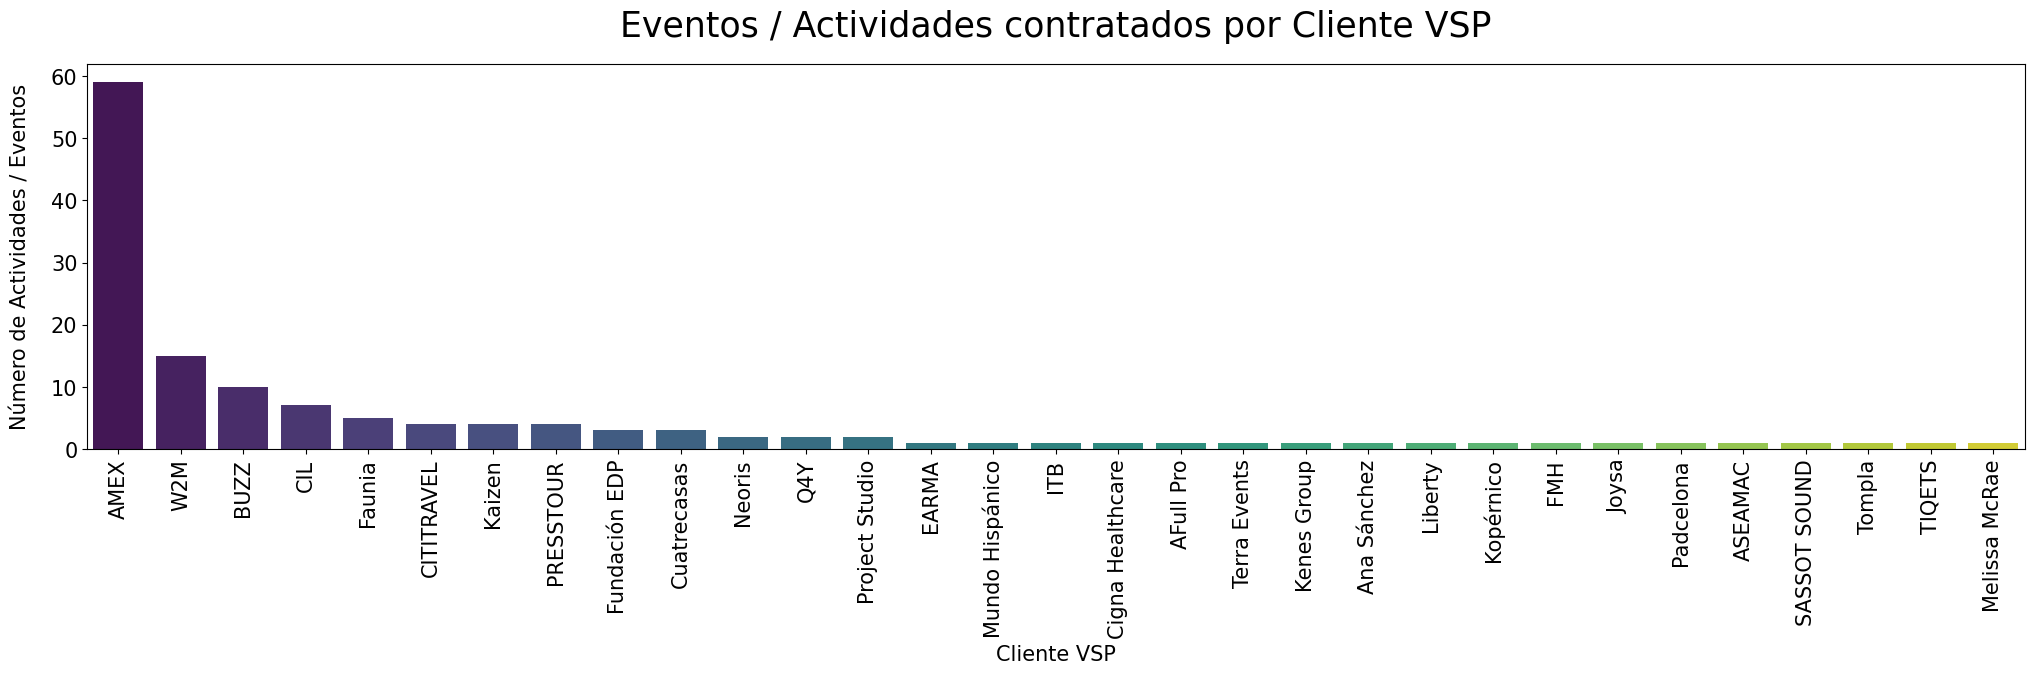

In [215]:
# Count occurrences and sort from highest to lowest
client_counts = data_servicios_vsp["cliente_vsp"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente VSP", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente VSP", size=25, pad=20)

plt.show()


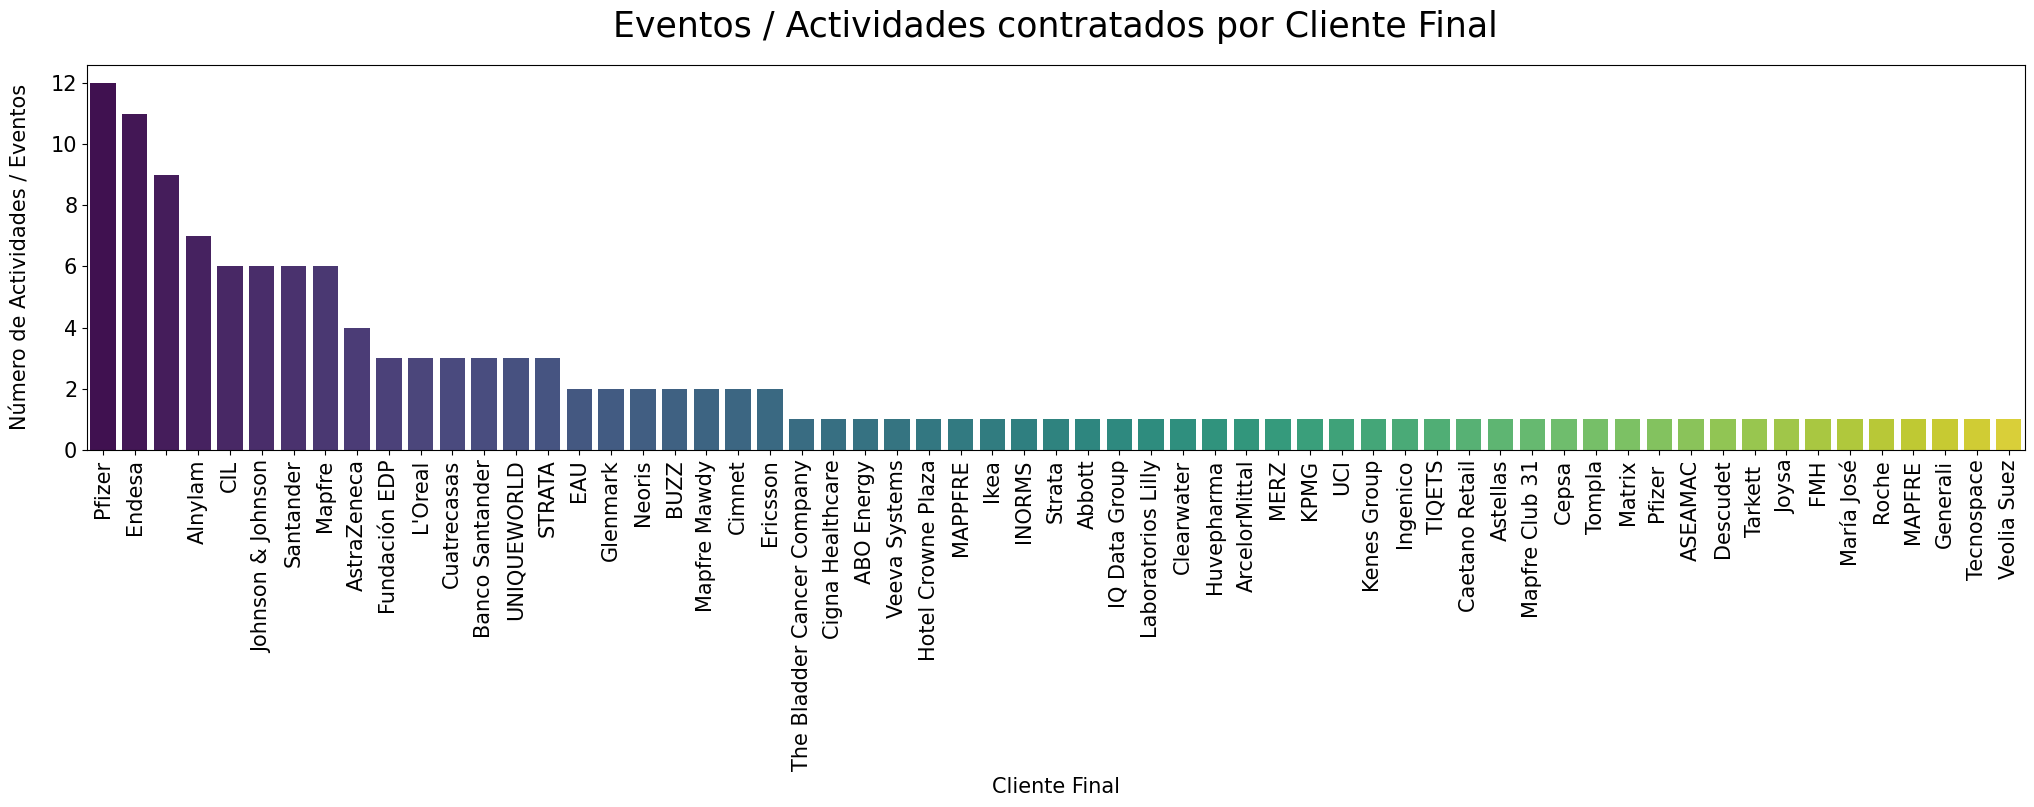

In [216]:
# Count occurrences and sort from highest to lowest
client_counts = data_servicios_vsp["cliente_final"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente Final", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente Final", size=25, pad=20)

plt.show()


In [217]:
# Extraer mes y año de 'fecha_evento'
data_servicios_vsp['mes_ano'] = data_servicios_vsp['fecha_evento'].dt.to_period('M')

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/3062208462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp['mes_ano'] = data_servicios_vsp['fecha_evento'].dt.to_period('M')


In [218]:
# Agrupar por mes/año y sumar ingresos y gastos
ingresos_gastos = data_servicios_vsp.groupby('mes_ano')[['pagos', 'cobros', 'margen']].sum()

In [219]:
data_servicios_vsp["pagos"] = data_servicios_vsp["pagos"].abs()
data_servicios_vsp["gasto_est_eur"] = data_servicios_vsp["gasto_est_eur"].abs()

/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/2700609183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["pagos"] = data_servicios_vsp["pagos"].abs()
/var/folders/4d/43ffh2510s79s7jcjxqhbd980000gn/T/ipykernel_4174/2700609183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_servicios_vsp["gasto_est_eur"] = data_servicios_vsp["gasto_est_eur"].abs()


In [220]:
ingresos_gastos

,pagos,cobros,margen
mes_ano,,,
2023-10,-9855.0,17136.6,6384.0
2023-11,-4861.9,10795.2,5342.4
2023-12,-14954.0,26062.1,8459.0
2024-01,-9681.5,14728.5,3455.1
2024-02,-2713.4,5400.0,2267.8
2024-03,-12969.7,15788.3,410.3
2024-04,-18591.3,24340.3,2499.3
2024-05,-5720.3,9425.0,2787.5
2024-06,-7969.6,11321.3,1843.5


In [221]:
ingresos_gastos.index = ingresos_gastos.index.to_timestamp()

In [222]:
# Crear un rango de meses para 2024
meses = pd.date_range('2024-01-01', '2024-12-01', freq='MS').month_name()

# Asegurarnos de que los datos tengan un índice de fechas para cada mes
ingresos_gastos['month_name'] = ingresos_gastos.index.month_name()

# Reindexar el DataFrame para incluir todos los meses de 2024
ingresos_gastos = ingresos_gastos.set_index('month_name').reindex(meses, fill_value=np.nan)

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Ingresos
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='cobros', 
             label='Ingresos', marker='o', color='green', linewidth=2, markersize=8)

# Gastos
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='pagos', 
             label='Gastos', marker='o', color='red', linewidth=2, markersize=8)

# Margen
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='margen', 
             label='Margen', marker='o', color='black', linewidth=2, markersize=8)

# Mejorar la visualización
plt.xlabel('Mes', size=15, labelpad=10)
plt.ylabel('Euros', size=15, labelpad=10)
plt.title('Ingresos vs Gastos Mensuales en 2024', size=18, pad=20)

# Ajustes para las etiquetas del eje X
plt.xticks(rotation=45, size=12)

# Establecer los nombres de los meses como etiquetas del eje X
plt.xticks(ticks=range(len(meses)), labels=meses, rotation=45, size=12)

# Formatear el eje Y con símbolo de euro
plt.yticks(size=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'€{x:,.0f}'))

# Cuadrícula y transparencia
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda
plt.legend(title='Categorías', loc='upper left', fontsize=12, frameon=False)

# Asegurarse de que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

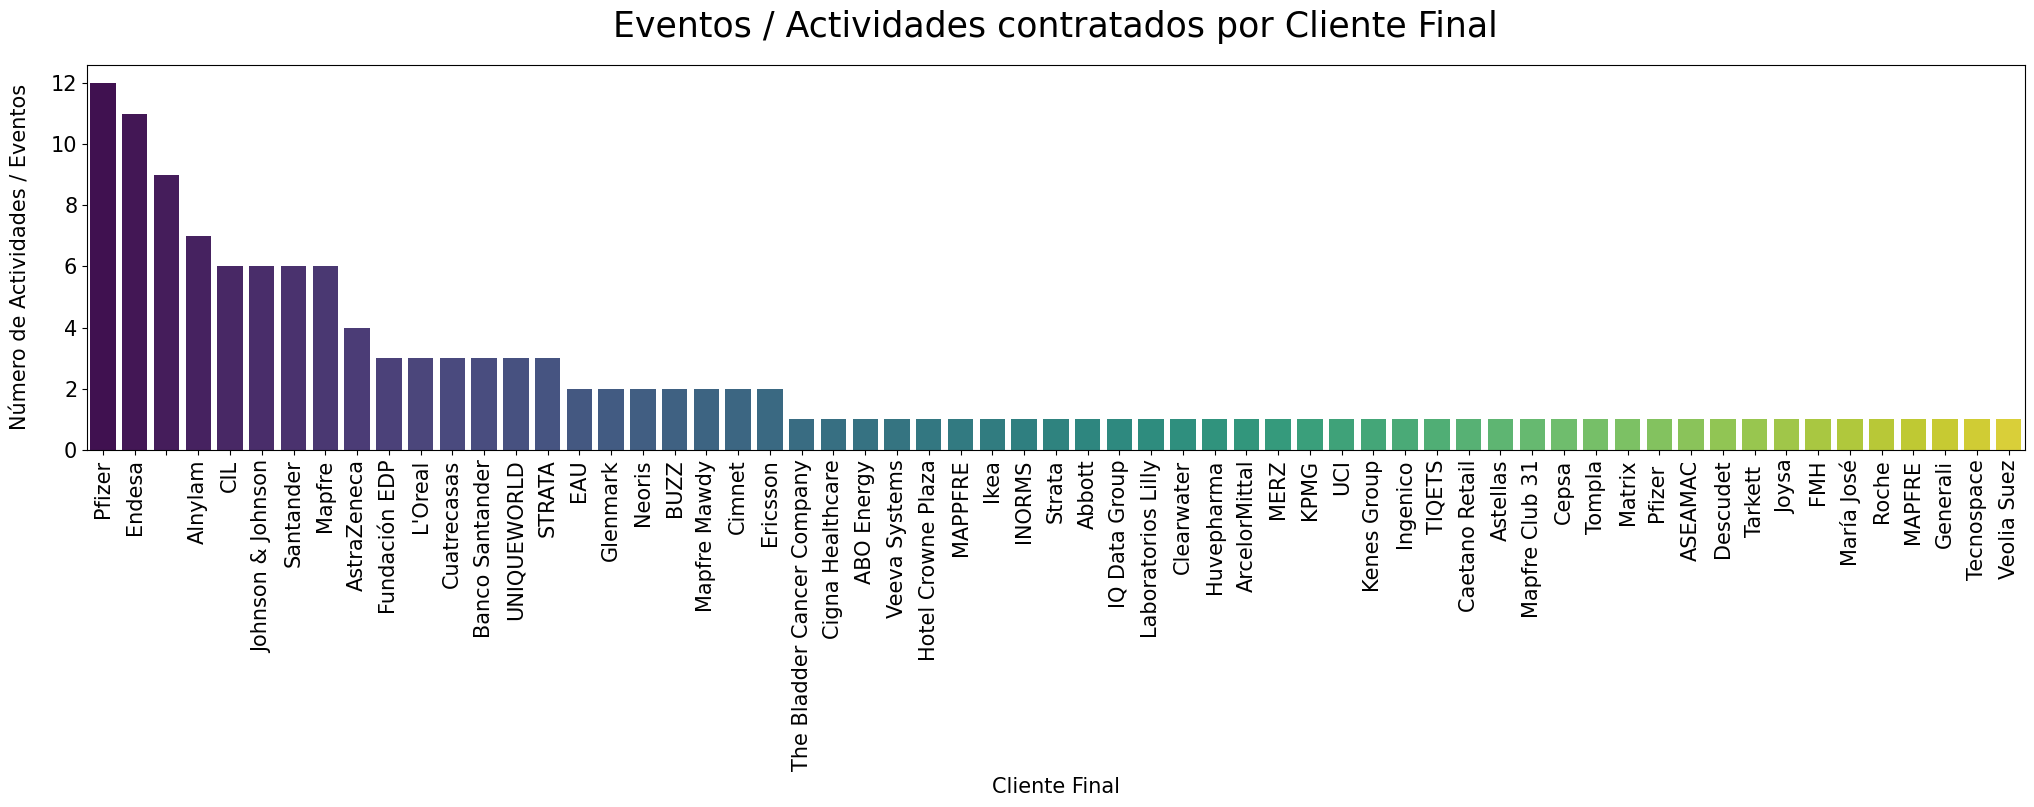

In [ ]:
# Count occurrences and sort from highest to lowest
client_counts = data_servicios_vsp["cliente_final"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente Final", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente Final", size=25, pad=20)

plt.show()

In [ ]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
actividad_summary = data_servicios_vsp.groupby('tipo_actividad')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
actividad_summary = actividad_summary.sort_values(by='margen', ascending=True)


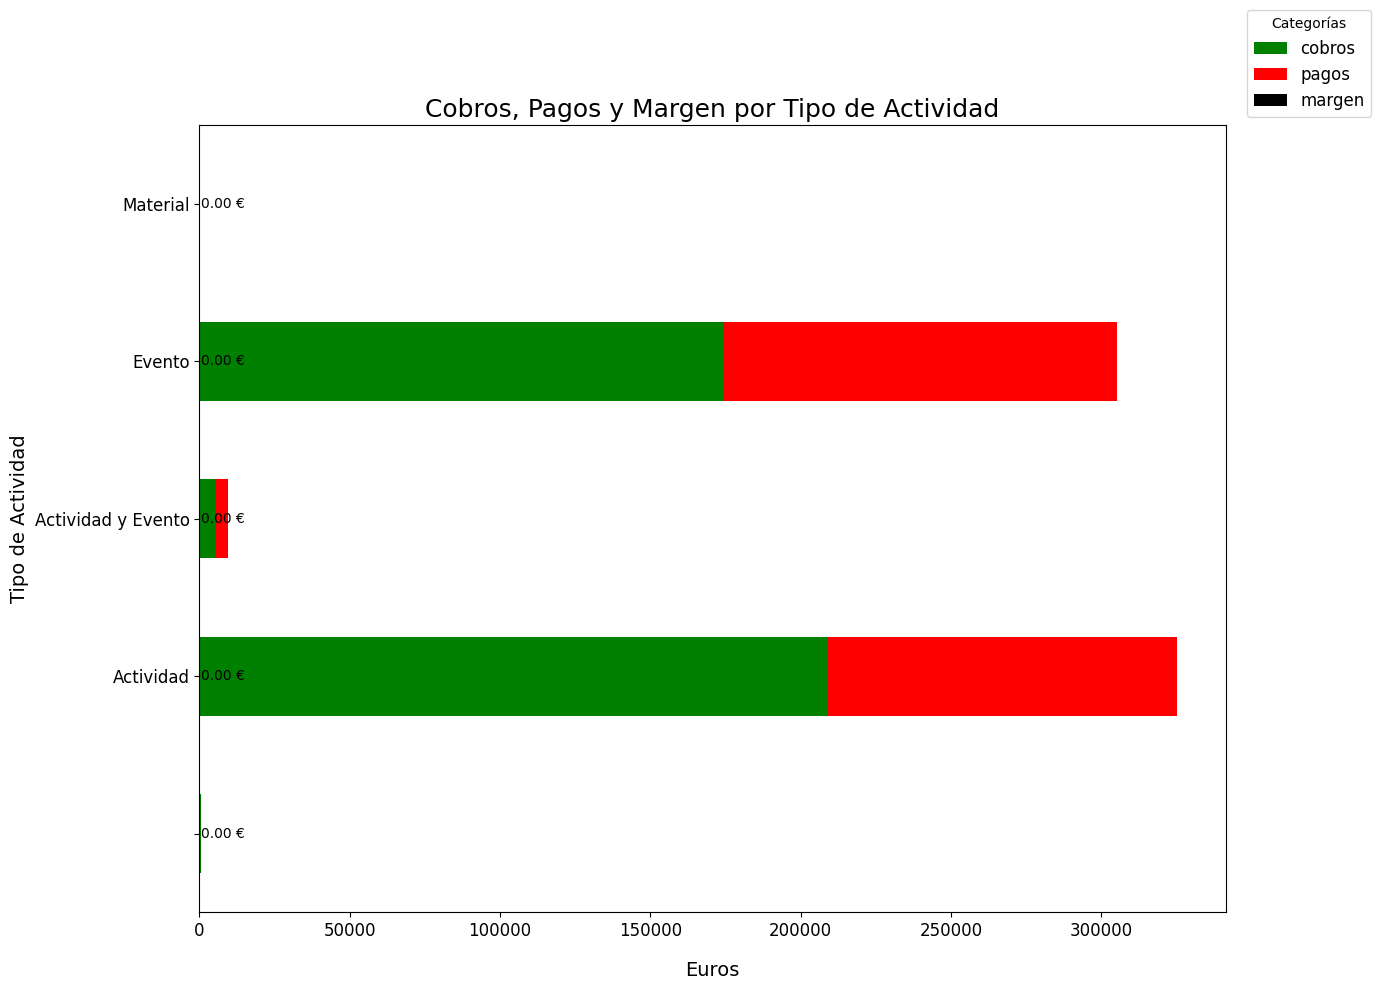

In [ ]:
import matplotlib.pyplot as plt

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked horizontal bars
actividad_summary.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red', 'black'])

# Improve visualization
plt.ylabel('Tipo de Actividad', size=14)
plt.xlabel('Euros', size=14, labelpad=15)
plt.title('Cobros, Pagos y Margen por Tipo de Actividad', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

# Move the legend to top right outside of plot
plt.legend(title='Categorías', loc='lower right', fontsize=12, bbox_to_anchor=(1.15, 1))

# Add annotations for margin values, adjusting position dynamically
for p in ax.patches:
    if p.get_facecolor() == (0, 0, 0, 1):  # Black bars (margen)
        bar_value = p.get_width()  # Get margin value
        xpos = p.get_x() + bar_value  # Position relative to bar
        ypos = p.get_y() + p.get_height() / 2  # Center vertically
        
        # Adjust label position: right for positive, left for negative
        ha = 'left' if bar_value >= 0 else 'right'
        offset = 500 if bar_value >= 0 else -500  # Offset to avoid overlap
        
        ax.text(xpos + offset, ypos, f'{bar_value:,.2f} €', 
                ha=ha, va='center', fontsize=10, color='black')

# Improve layout
plt.tight_layout()
plt.show()


In [ ]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
cliente_summary = data_servicios_vsp.groupby('cliente_vsp')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
cliente_summary = cliente_summary.sort_values(by='margen', ascending=True)

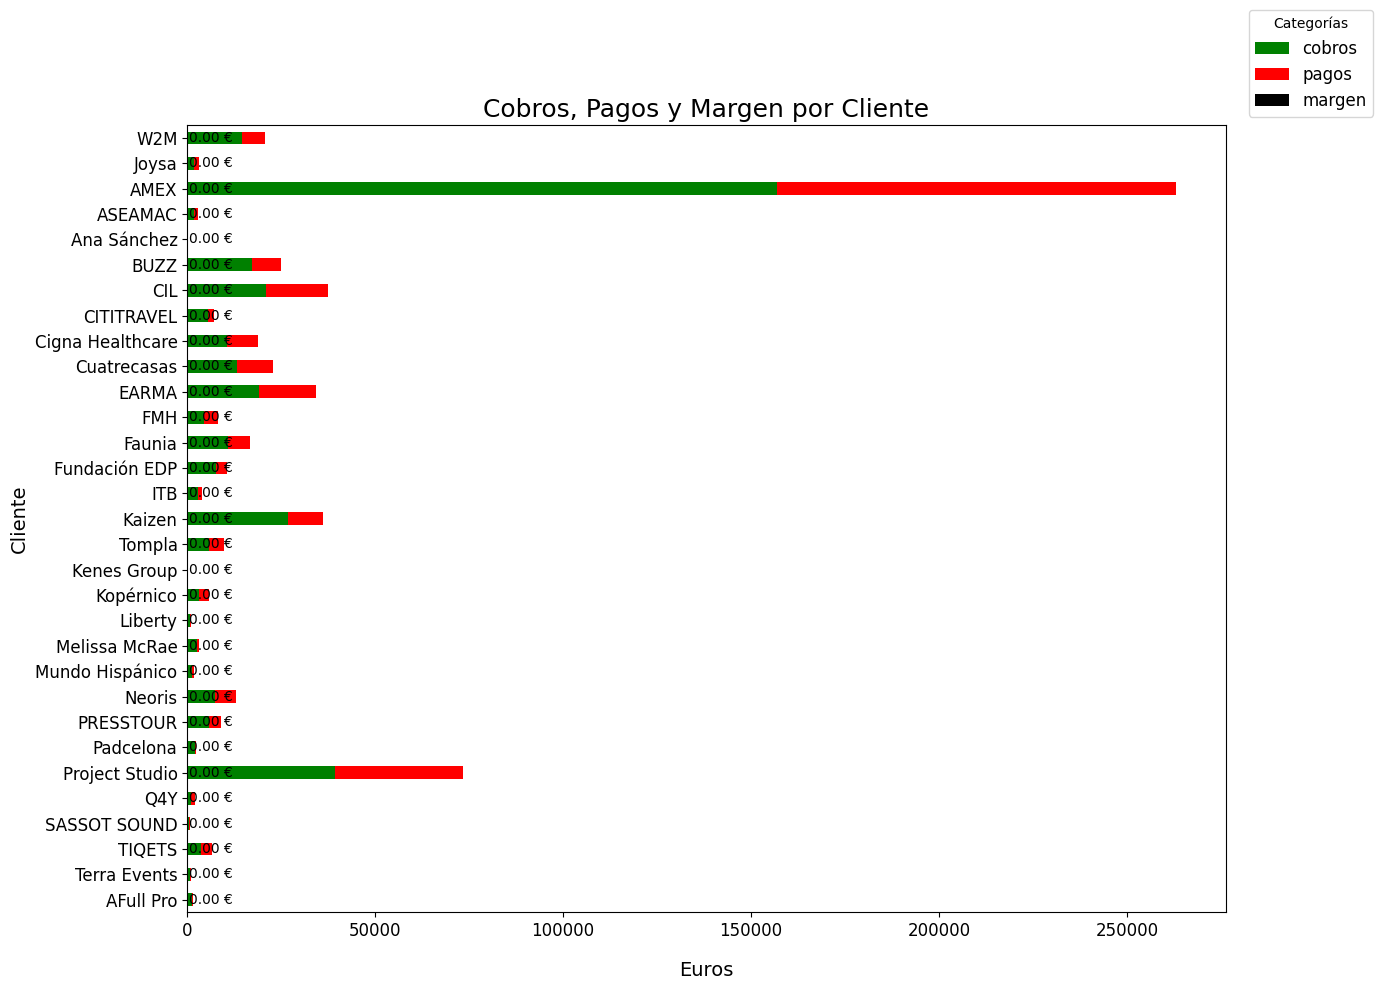

In [ ]:
import matplotlib.pyplot as plt

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked horizontal bars
cliente_summary.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red', 'black'])

# Improve visualization
plt.ylabel('Cliente', size=14)
plt.xlabel('Euros', size=14, labelpad=15)
plt.title('Cobros, Pagos y Margen por Cliente', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

# Move the legend to top right outside of plot
plt.legend(title='Categorías', loc='lower right', fontsize=12, bbox_to_anchor=(1.15, 1))

# Add annotations for margin values, adjusting position dynamically
for p in ax.patches:
    if p.get_facecolor() == (0, 0, 0, 1):  # Black bars (margen)
        bar_value = p.get_width()  # Get margin value
        xpos = p.get_x() + bar_value  # Position relative to bar
        ypos = p.get_y() + p.get_height() / 2  # Center vertically
        
        # Adjust label position: right for positive, left for negative
        ha = 'left' if bar_value >= 0 else 'right'
        offset = 500 if bar_value >= 0 else -500  # Offset to avoid overlap
        
        ax.text(xpos + offset, ypos, f'{bar_value:,.2f} €', 
                ha=ha, va='center', fontsize=10, color='black')

# Improve layout
plt.tight_layout()
plt.show()


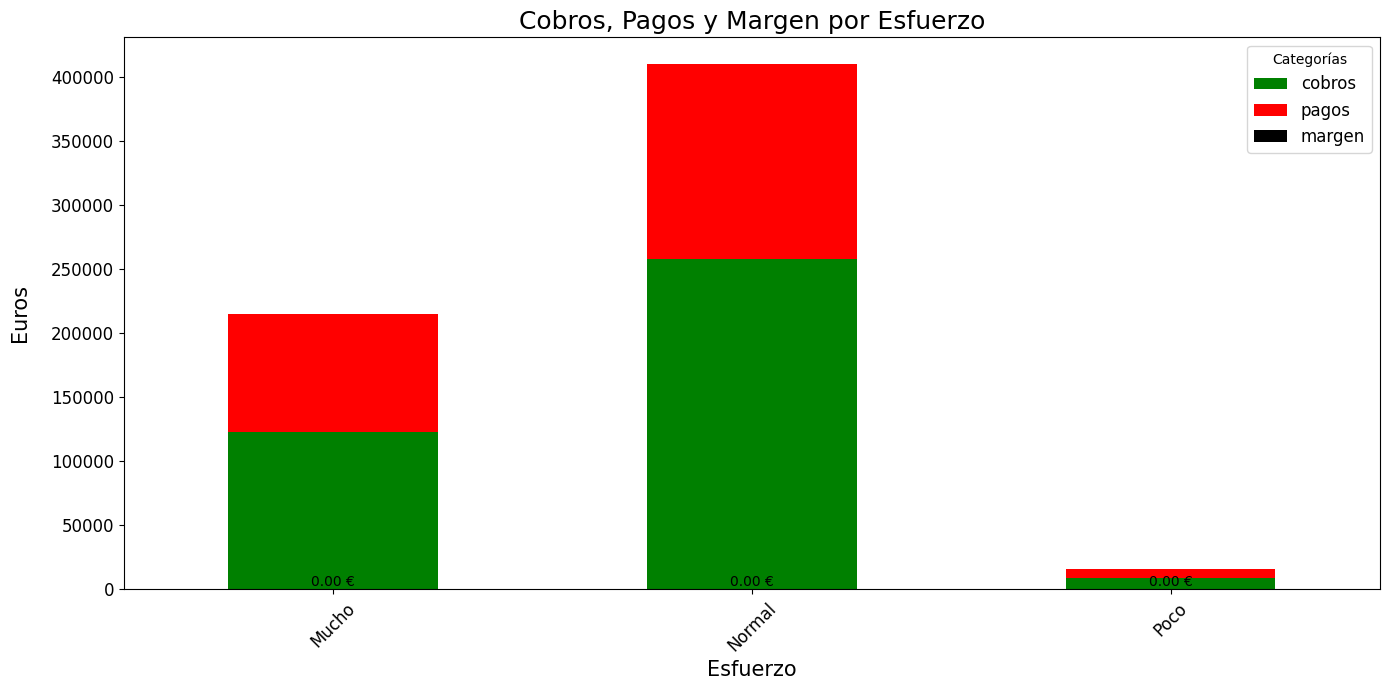

In [ ]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
cliente_summary = data_servicios_vsp.groupby('esfuerzo')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
actividad_summary = cliente_summary.sort_values(by='margen', ascending=False)

# Crear el gráfico de barras apiladas
ax = cliente_summary.plot(kind='bar', stacked=True, figsize=(14, 7), color=['green', 'red', 'black'])

# Mejorar la visualización
plt.xlabel('Esfuerzo', size=15)
plt.ylabel('Euros', size=15, labelpad=15)
plt.title('Cobros, Pagos y Margen por Esfuerzo', size=18)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

# Mover la leyenda a la esquina superior derecha
plt.legend(title='Categorías', loc='upper right', fontsize=12)

# Añadir anotaciones a las barras de margen
for p in ax.patches:
    # Obtener la altura de la barra (representa el valor acumulado)
    height = p.get_height()
    
    # Verificar si la barra corresponde al margen (color negro)
    if p.get_facecolor() == (0, 0, 0, 1):  # Color negro en formato RGBA
        # Obtener la posición X de la barra (es la misma para todas las barras apiladas)
        x = p.get_x() + p.get_width() / 2
        
        # Colocar la anotación encima de la barra de margen
        ax.text(x, p.get_y() + height + 10, f'{height:,.2f} €', ha='center', va='bottom', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Tiempo desde contacto a Evento

In [ ]:
# Calcular la diferencia en días entre 'fecha_evento' y 'fecha_contacto'
data_servicios_vsp['dias_hasta_evento'] = (data_servicios_vsp['fecha_evento'] - data_servicios_vsp['fecha_contacto']).dt.days

KeyError: 'fecha_contacto'

In [ ]:
# Filtrar las filas donde la fecha de contacto es posterior a la fecha de evento
eventos_incorrectos = data_servicios_vsp[data_servicios_vsp['fecha_contacto'] > data_servicios_vsp['fecha_evento']]

# Ver las filas con fecha de contacto posterior a la fecha del evento
eventos_incorrectos


,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,...,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento,mes_ano


In [ ]:
data_servicios_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año,mes_ano
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,19.3,2890.0,1122.0,1768.0,2865.9,1158.3,NaN,Normal,iPad Challenge,10,2023,2023-10
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,18.0,720.0,630.0,90.0,720.0,630.3,NaN,Normal,Mariachi,10,2023,2023-10
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,21.5,4300.0,2580.0,1720.0,3553.7,3099.4,NaN,Normal,Espectáculo flamenco,10,2023,2023-10
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,71.9,4311.0,1828.0,2483.0,4311.0,2167.4,NaN,Normal,iPad Challenge,10,2023,2023-10
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,40.5,1296.0,358.0,938.0,1296.0,382.2,NaN,Normal,iPad Challenge,10,2023,2023-10


In [ ]:
# Crear un gráfico de dispersión para analizar la relación entre los días hasta el evento y el margen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_servicios_vsp, x='dias_hasta_evento', y='margen', color='blue', hue = "esfuerzo")

# Mejorar la visualización
plt.xlabel('Días hasta el evento', size=15)
plt.ylabel('Margen (€)', size=15)
plt.title('Relación entre los días hasta el evento y el margen', size=18)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `dias_hasta_evento` for parameter `x`

<Figure size 1000x600 with 0 Axes>

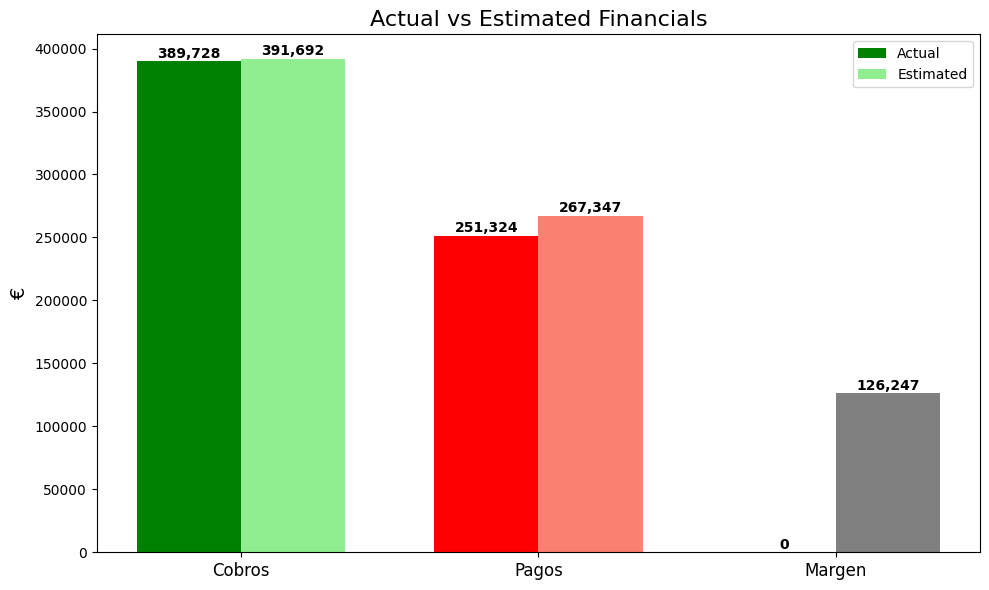

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['Cobros', 'Pagos', 'Margen']

# Get actual and estimated values
actual_values = [
    data_servicios_vsp['cobros'].sum(),
    data_servicios_vsp['pagos'].sum(),
    data_servicios_vsp['margen'].sum()
]

estimated_values = [
    data_servicios_vsp['ingreso_est_eur'].sum(),
    data_servicios_vsp['gasto_est_eur'].sum(),
    data_servicios_vsp['margen_est_eur'].sum()
]

# Define bar positions
x = np.arange(len(categories))
width = 0.35  # Width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, actual_values, width, label='Actual', color=['green', 'red', 'black'])
bars2 = ax.bar(x + width/2, estimated_values, width, label='Estimated', color=['lightgreen', 'salmon', 'gray'])

# Labels and title
ax.set_ylabel('€', fontsize=14)
ax.set_title('Actual vs Estimated Financials', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()

# Add annotations on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height:,.0f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
data_servicios_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,lugar_evento,pax,eur_pax,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,actividad,mes,año
0,Actividad,2023-10-03,Faunia,UCI,Faunia,150,19.3,2890.0,1122.0,1768,2865.9,-1158.3,1707.60,Normal,iPad Challenge,10,2023
1,Evento,2023-10-08,CIL,María José,Masía José Luis,40,18.0,720.0,630.0,90,720.0,-630.3,-40.80,Normal,Mariachi,10,2023
2,Evento,2023-10-18,TIQETS,TIQETS,FIBES Sevilla,200,21.5,4300.0,2580.0,1720,3553.7,-3099.4,-13.30,Normal,Espectáculo flamenco,10,2023
3,Actividad,2023-10-20,Kaizen,Caetano Retail,Madrid,60,71.9,4311.0,1828.0,2483,4311.0,-2167.4,2125.90,Normal,iPad Challenge,10,2023
4,Actividad,2023-10-24,CITITRAVEL,Astellas,Madrid,32,40.5,1296.0,358.0,938,1296.0,-382.2,913.90,Normal,iPad Challenge,10,2023


In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Definir DF actividades y eventos
data_actividades_vsp = data_servicios_vsp[data_servicios_vsp["tipo_actividad"] == "Actividad"]
data_eventos_vsp = data_servicios_vsp[data_servicios_vsp["tipo_actividad"] == "Evento"]




In [232]:
resumen_actividades = data_actividades_vsp.groupby('actividad').agg(total=("actividad","count"), margen=("margen","mean")).round(2)

resumen_actividades.sample(15)

,total,margen
actividad,,
Indoor iPad Challenge,4,850.18
Casino Años 20,1,1574.30
iPad Challenge,21,1999.93
Gymkhana,2,1030.65
Golf,1,343.00
Clase de Sevillanas,1,650.90
Tour Guiado + Comida,3,-516.37
Actividades en la Naturaleza,1,370.00
"Green Society Hall Escape,Team Painting,Taller de Percusión,Master Chef Challenge",1,0.00


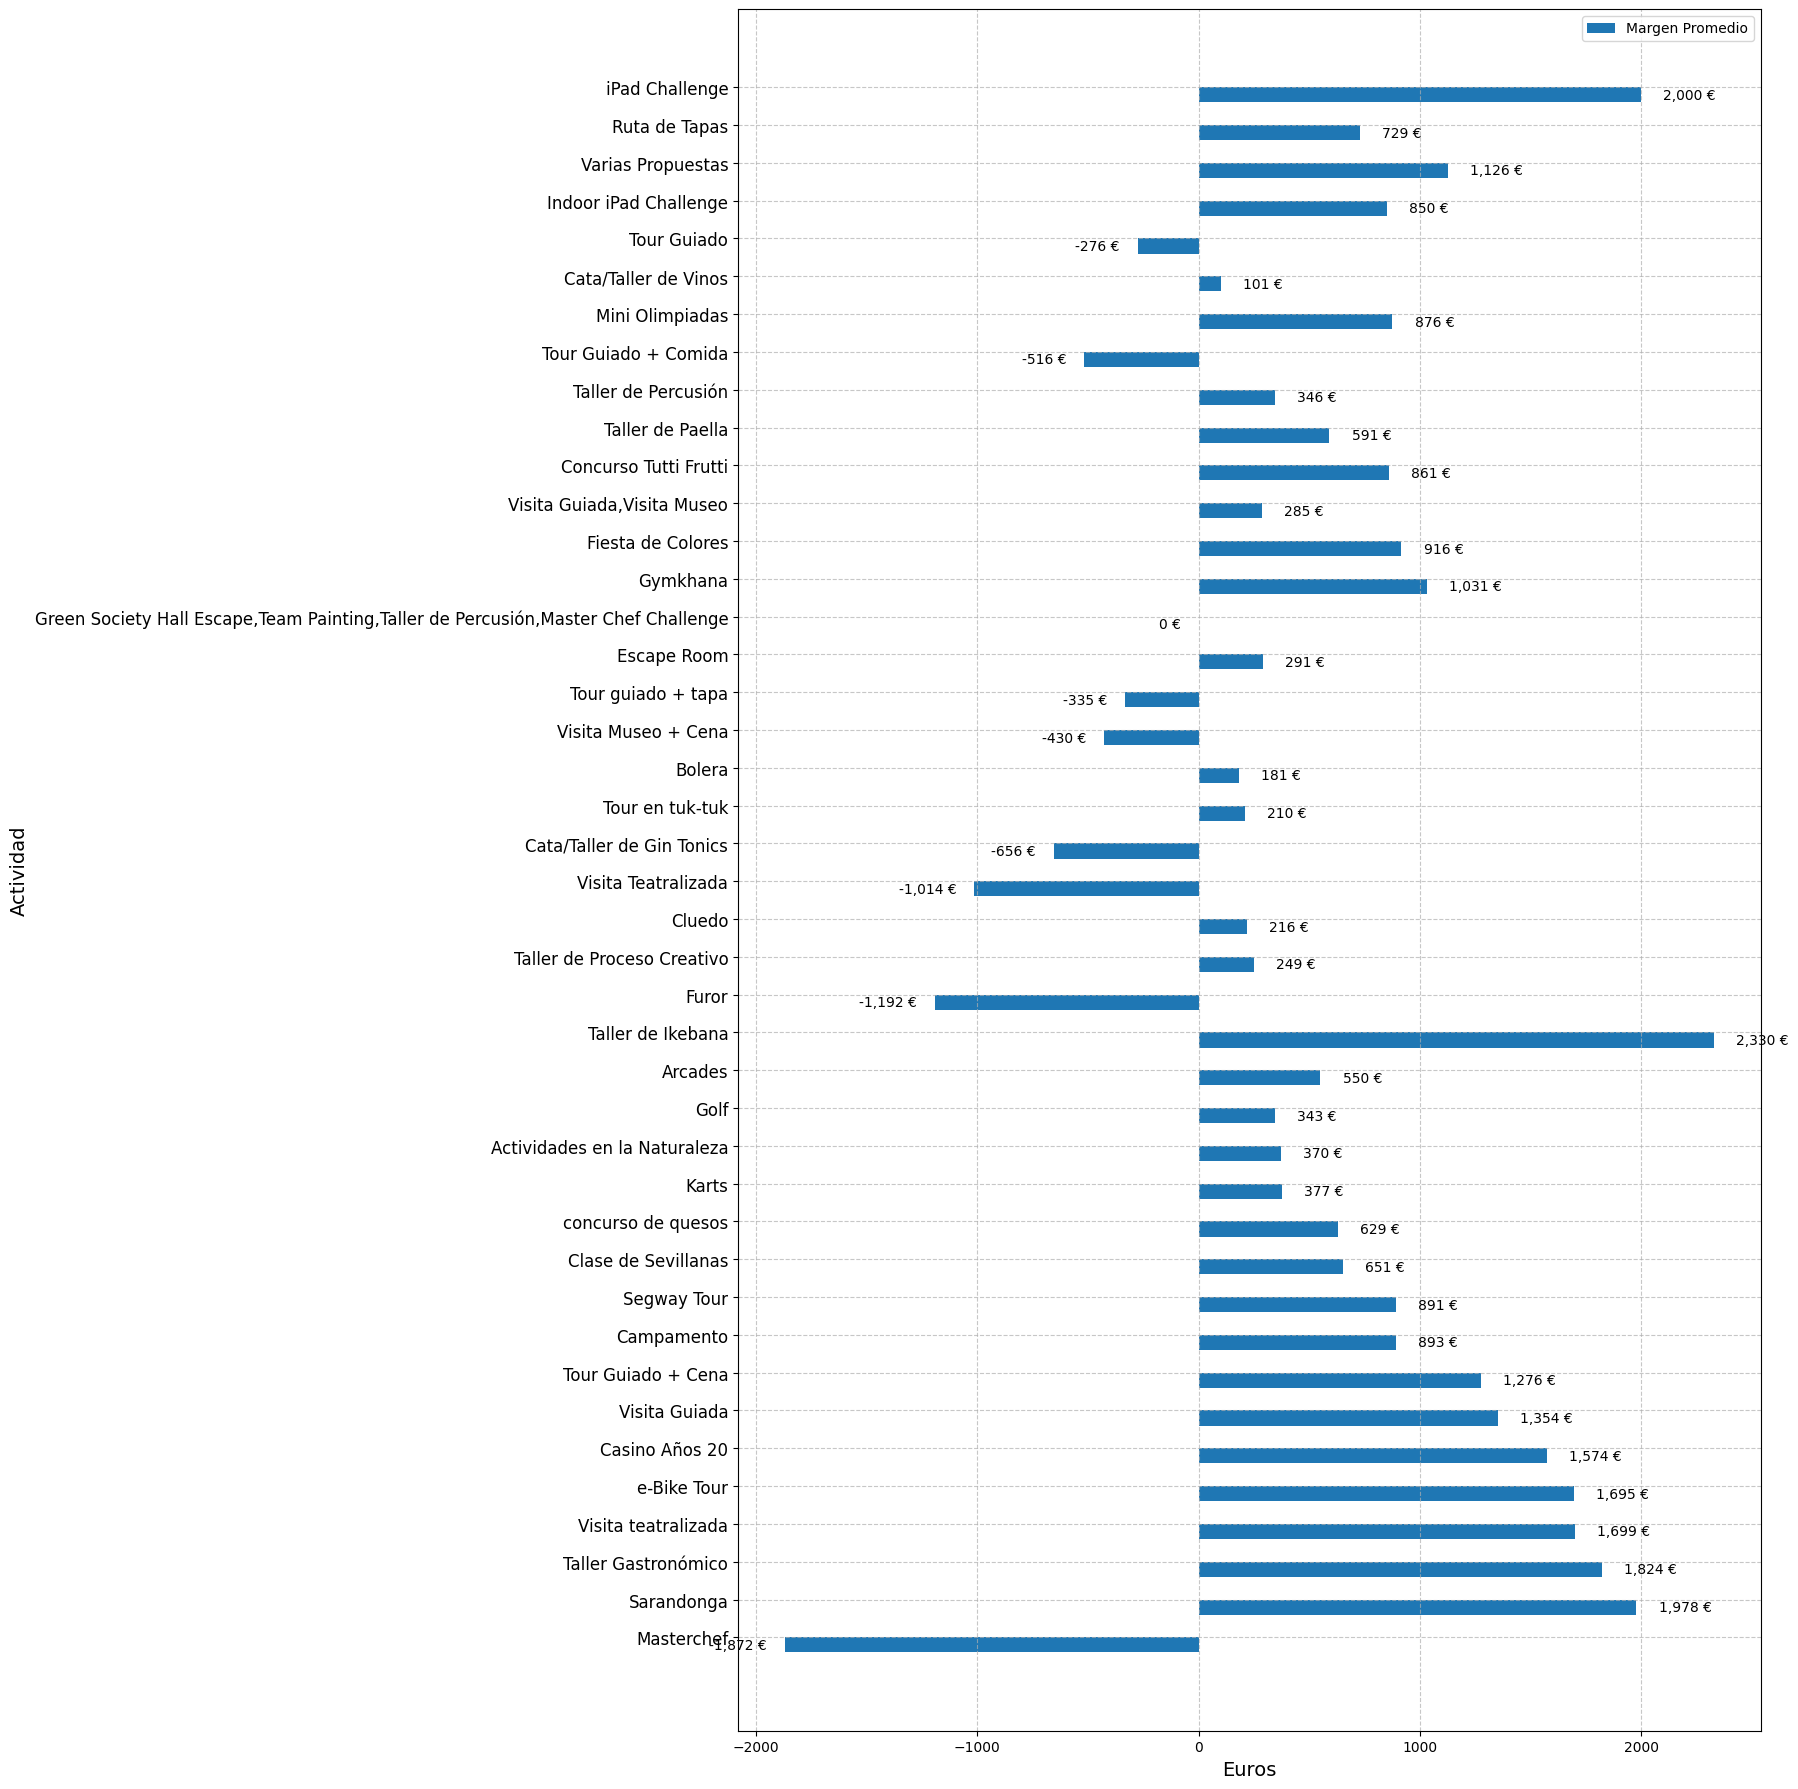

In [247]:

# Sort by actual margin (ascending for horizontal bars)
resumen_actividades = resumen_actividades.sort_values(by='total', ascending=True)

# Define custom positions with extra spacing
n = len(resumen_actividades)
y_pos = np.arange(n) * 3  # Creates space between each activity group

# Define bar width
bar_width = 1.2  

# Create figure
fig, ax = plt.subplots(figsize=(18, 18))

# Plot bars (Actual vs Estimated)
bars1 = ax.barh(y_pos - bar_width/2, resumen_actividades['margen'], bar_width, label='Margen Promedio', color='#1f77b4')  # Blue

# Labels and title
ax.set_ylabel('Actividad', fontsize=14)
ax.set_xlabel('Euros', fontsize=14)

# Set y-ticks with spacing
ax.set_yticks(y_pos)
ax.set_yticklabels(resumen_actividades.index, fontsize=12)

# Add grid
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.grid(axis="y", linestyle="--", alpha=0.7)


# Add annotations on bars
for bars in [bars1]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 100 if width > 0 else width - 80,  # Adjust position dynamically
                bar.get_y() + bar.get_height() / 2, 
                f'{width:,.0f} €', ha='left' if width > 0 else 'right', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.legend()
plt.show()

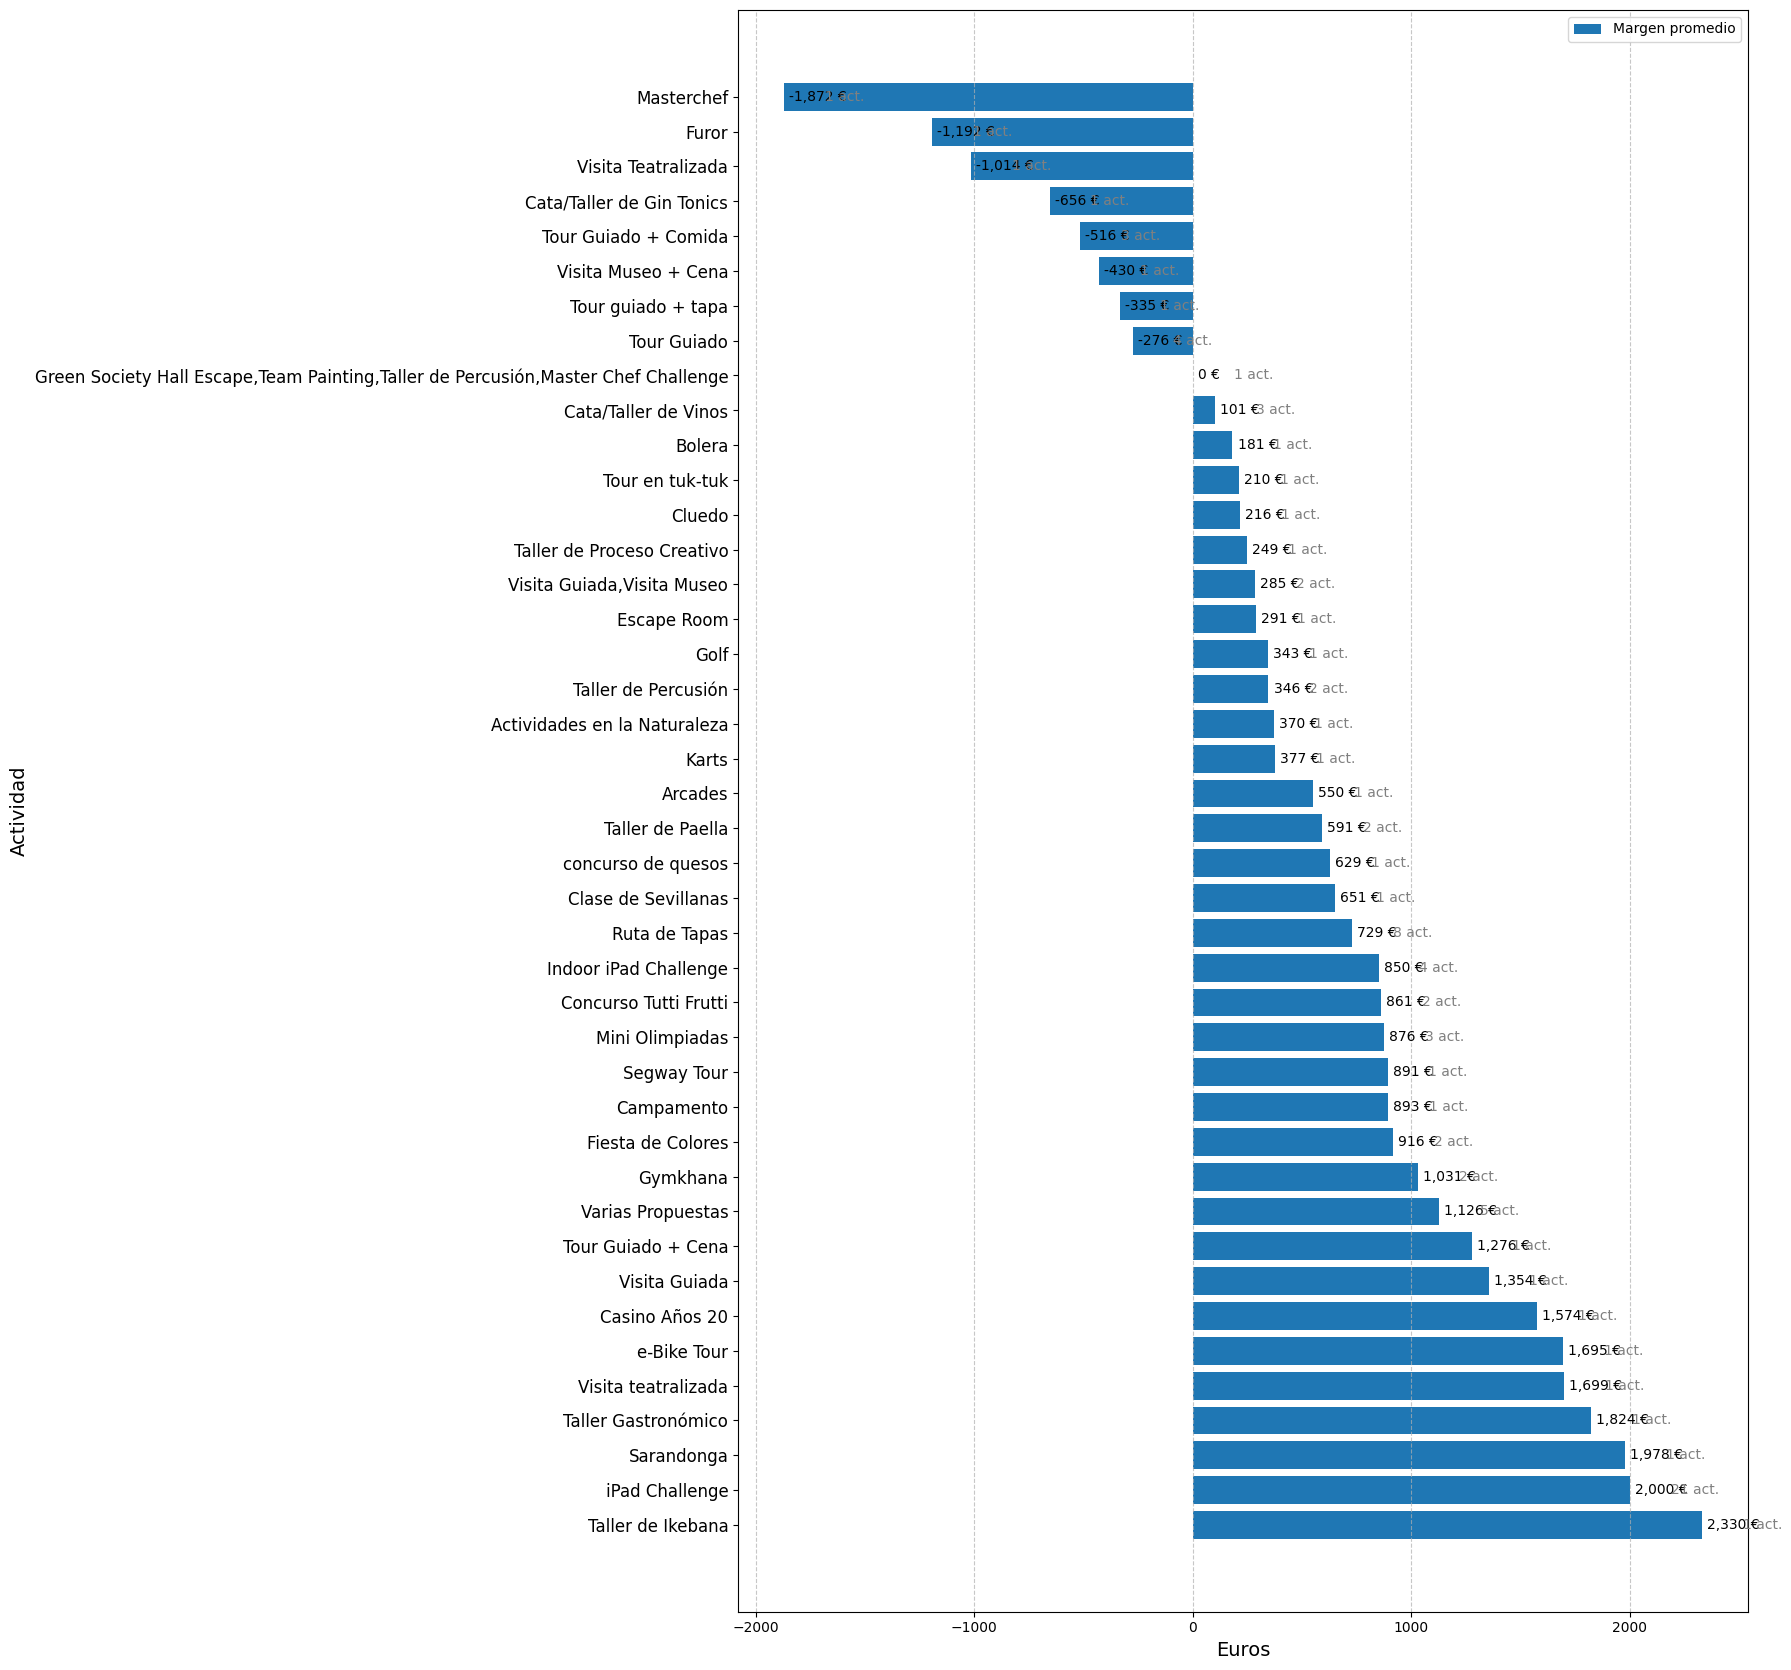

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Orden inicial por margen (desc)
resumen_plot = resumen_actividades.sort_values(by='margen', ascending=False)

n = len(resumen_plot)
y_pos = np.arange(n)
bar_height = 0.8

fig, ax = plt.subplots(figsize=(18, max(6, n * 0.4)))

bars = ax.barh(
    y_pos,
    resumen_plot['margen'],
    height=bar_height,
    color='#1f77b4',
    label='Margen promedio'
)

ax.set_ylabel('Actividad', fontsize=14)
ax.set_xlabel('Euros', fontsize=14)
ax.set_yticks(y_pos)
ax.set_yticklabels(resumen_plot.index, fontsize=12)

ax.grid(axis="x", linestyle="--", alpha=0.7)

max_margen = resumen_plot['margen'].max()
offset_margen = max_margen * 0.01   # separación pequeña
offset_total  = max_margen * 0.08   # un poco más lejos para la segunda etiqueta

for i, bar in enumerate(bars):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    total_acts = resumen_plot['total'].iloc[i]

    # Etiqueta 1: margen
    ax.text(
        width + offset_margen,
        y,
        f'{width:,.0f} €',
        va='center',
        ha='left',
        fontsize=10
    )

    # Etiqueta 2: total actividades
    ax.text(
        width + 100,
        y,
        f'{total_acts} act.',
        va='center',
        ha='left',
        fontsize=10,
        color='gray'
    )

plt.tight_layout()
plt.legend()
plt.show()
